In [40]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [50]:
Data = pd.read_csv(r"C:\Users\samer\Desktop\Project_Latest\all_cleaned.csv", encoding="utf8")
Data = Data.loc[:, ~Data.columns.str.startswith('Unnamed')]

Data.head()

,username,description,location,following,followers,totaltweets,tweetid,source,tweetdate,tweetlength,likescount,retweetcount,text,hashtags,len_hashtags,city,country,Subjectivity,Polarity,Analysis
0,MomAgainstMedia,Writer/Activist/MAM/Survivor fka Desi Foxx Fig...,"Tampa Bay, FL USA",3054,2056,42554,1336822797360902145,ANDROID,2020-12-09,177,0,1,whole portfolio covid19vaccine free aborted fe...,['COVID19Vaccine'],1,Tampa Bay,USA,0.666667,0.333333,Positive
1,MadjaTee,"Gardener, kayaker, hiker, “friend of Mara”, en...","New York, USA",336,89,3707,1336822562135945220,APPLE,2020-12-09,186,1,0,made available excited glad part reopen econom...,"['COVID19Vaccine', 'JustDoIt']",2,New York,USA,0.560000,0.285000,Positive
2,ElsaWSOC9,Reporter @wsoctv\nHost @Your704\n@Cornell grad...,"Charlotte, NC",582,3008,8211,1336822293901824009,APPLE,2020-12-09,81,1,2,questions covid19vaccine tune tcoek9euth4b6,['COVID19Vaccine'],1,Charlotte,USA,0.000000,0.000000,Neutral
3,jendlake,Theme Lead @uoftmedicine/ PhD student @ihpmeuo...,"Toronto, ON CANADA",3921,2490,20177,1336821906364837888,ANDROID,2020-12-09,152,2,0,good thread covid covid19vaccine allergies ess...,"['covid', 'COVID19Vaccine', 'allergies']",3,Toronto,CANADA,0.300000,0.233333,Positive
4,EddieMaqbool,NaN,"Secaucus, NJ",27,2,104,1336821674109497351,ANDROID,2020-12-09,232,3,0,f israel getting vaccine uk canada approved st...,"['COVID19', 'COVID19Vaccine', 'COVID']",3,Secaucus,USA,0.500000,-0.250000,Negative


In [166]:
x = Data.Analysis.value_counts()
x = pd.DataFrame(x)
x

,Analysis
Positive,928
Neutral,735
Negative,255


In [61]:
# Number of Tweets by Country
No_Tweets_Country = Data.groupby(by=["country"])["tweetid"].count()
No_Tweets_Country = pd.DataFrame(No_Tweets_Country)
No_Tweets_Country = No_Tweets_Country.sort_values(by=['tweetid'], ascending=False)[0:5]
No_Tweets_Country.reset_index(level=0, inplace=True)

In [62]:
No_Tweets_Country

,country,tweetid
0,USA,802
1,ENGLAND,322
2,INDIA,188
3,CANADA,150
4,EUROPE,53


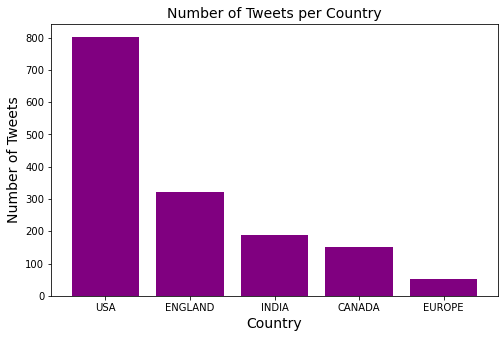

In [63]:
#New_Colors = ['green',"yellow", 'blue','purple','brown','teal', "black", "orange", "red", "cyan"]

f, ax = plt.subplots(figsize=(8,5))

ax.bar(No_Tweets_Country["country"], No_Tweets_Country["tweetid"], color = "purple")

plt.title('Number of Tweets per Country', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.show()

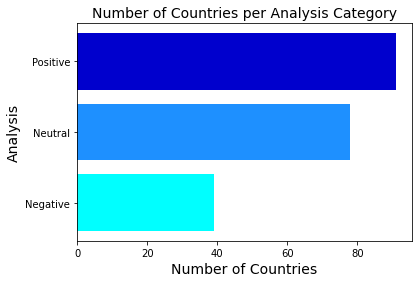

In [69]:
# Number of Unique Countries per Analysis
No_of_Country_Analysis = Data.groupby(["Analysis"]).country.nunique()

No_of_Country_Analysis = pd.DataFrame(No_of_Country_Analysis)
No_of_Country_Analysis.reset_index(level=0, inplace=True)

New_Colors = ['cyan','dodgerblue','mediumblue']

plt.barh(No_of_Country_Analysis["Analysis"], No_of_Country_Analysis["country"], color = New_Colors)

plt.title('Number of Countries per Analysis Category', fontsize=14)
plt.ylabel('Analysis', fontsize=14)
plt.xlabel('Number of Countries', fontsize=14)
plt.show()

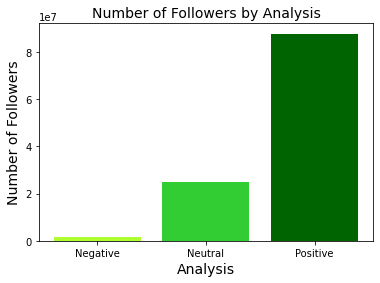

In [78]:
# Reach of each Analysis (Number of Followers)
No_of_Followers_Analysis = Data.groupby(["Analysis"]).followers.sum()

No_of_Followers_Analysis = pd.DataFrame(No_of_Followers_Analysis)
No_of_Followers_Analysis.reset_index(level=0, inplace=True)

New_Colors = ['greenyellow','limegreen','darkgreen']

plt.bar(No_of_Followers_Analysis["Analysis"], No_of_Followers_Analysis["followers"], color = New_Colors)

plt.title('Number of Followers by Analysis', fontsize=14)
plt.xlabel('Analysis', fontsize=14)
plt.ylabel('Number of Followers', fontsize=14)
plt.show()

In [83]:
import seaborn as sns

<AxesSubplot:xlabel='Analysis', ylabel='followers'>

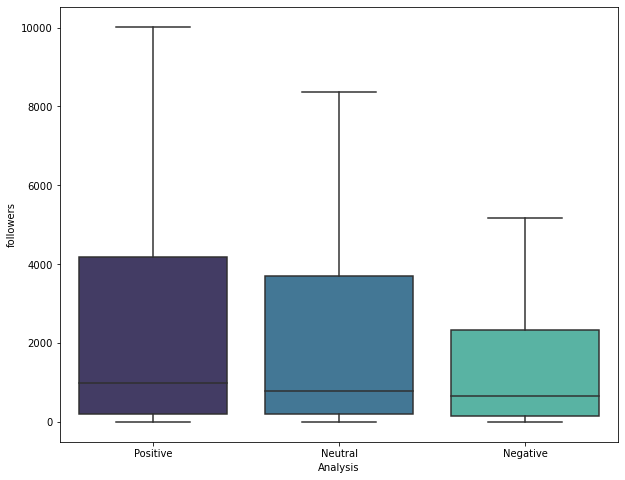

In [84]:
# Followers by Tweet Analysis
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(y='followers', x='Analysis', 
                 data=Data, ax=ax, 
                 palette="mako", showfliers = False)

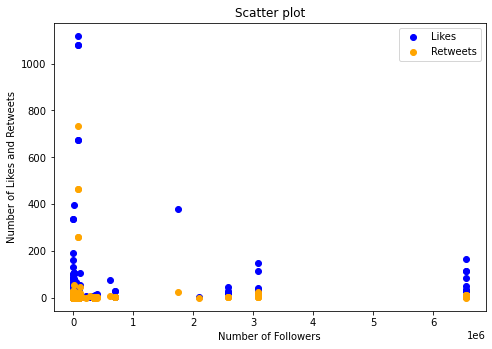

In [86]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

p1 = ax.scatter(Data["followers"], Data["likescount"], color='blue', label = "Likes")
p2 = ax.scatter(Data["followers"], Data["retweetcount"], color='orange', label = "Retweets")
ax.set_xlabel('Number of Followers')
ax.set_ylabel('Number of Likes and Retweets')
ax.set_title('Scatter plot')

ax.legend([p1, p2], ["Likes", "Retweets"])

plt.show()

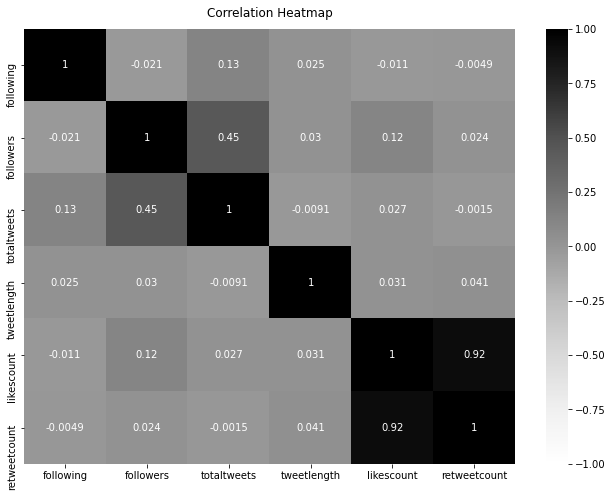

In [38]:
# Correlation Heat Map
num_variables = Data[["following", "followers", "totaltweets", "tweetlength", "likescount", "retweetcount"]]
plt.figure(figsize=(11, 8))
heatmap = sns.heatmap(num_variables.corr(), vmin=-1, vmax=1, annot=True, cmap="Greys")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

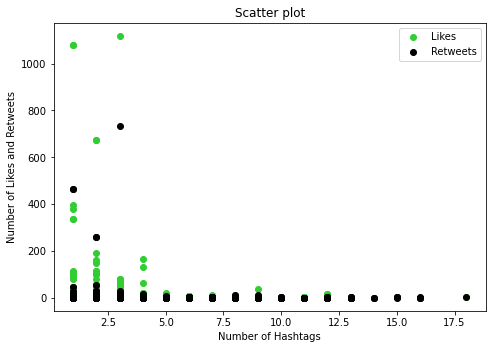

In [93]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

p1 = ax.scatter(Data["len_hashtags"], Data["likescount"], color='limegreen', label = "Likes")
p2 = ax.scatter(Data["len_hashtags"], Data["retweetcount"], color='black', label = "Retweets")
ax.set_xlabel('Number of Hashtags')
ax.set_ylabel('Number of Likes and Retweets')
ax.set_title('Scatter plot')

ax.legend([p1, p2], ["Likes", "Retweets"])

plt.show()

In [129]:
No_of_tweets_per_source = Data.groupby(['source']).tweetid.count()
No_of_tweets_per_source = pd.DataFrame(No_of_tweets_per_source)
No_of_tweets_per_source = No_of_tweets_per_source.sort_values(by=['tweetid'], ascending=False)
No_of_tweets_per_source.reset_index(level=0, inplace=True)
No_of_tweets_per_source

,source,tweetid
0,APPLE,643
1,WEB,642
2,ANDROID,370
3,TWEETDECK,108
4,HOOTSUITE INC.,52
5,BUFFER,20
6,SPROUT SOCIAL,11
7,DLVR.IT,7
8,TWITTER MEDIA STUDIO,7
9,SOCIALFLOW,6


In [138]:
No_of_tweets_per_source['source'] = ['OTHER' if (x != "APPLE" and x != "WEB" and x != "ANDROID") else x for x in No_of_tweets_per_source['source']]
No_of_tweets_per_source_modified = No_of_tweets_per_source.groupby(['source']).tweetid.sum()

No_of_tweets_per_source_modified = pd.DataFrame(No_of_tweets_per_source_modified)
No_of_tweets_per_source_modified = No_of_tweets_per_source_modified.sort_values(by=['tweetid'], ascending=False)
No_of_tweets_per_source_modified.reset_index(level=0, inplace=True)
No_of_tweets_per_source_modified

,source,tweetid
0,APPLE,643
1,WEB,642
2,ANDROID,370
3,OTHER,263


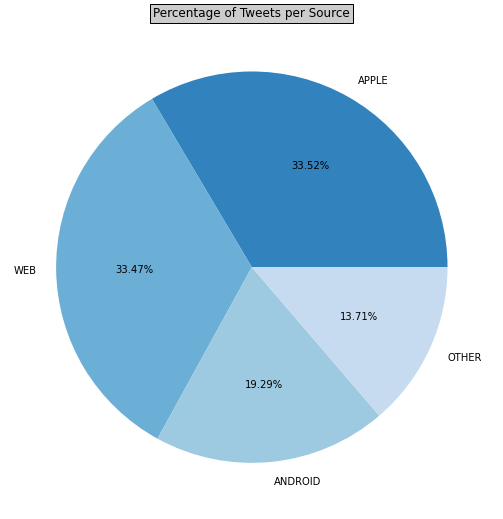

In [139]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(9,9) 

cmap = plt.get_cmap("tab20c")
inner_colors = cmap(np.array([0, 1, 2, 3]))

ax1.set_title('Percentage of Tweets per Source', 
             bbox={'facecolor':'0.8', 'pad':3})

ax1.pie(No_of_tweets_per_source_modified['tweetid'], labels=No_of_tweets_per_source_modified['source'], autopct='%1.2f%%', radius=1, colors = inner_colors)
plt.show()

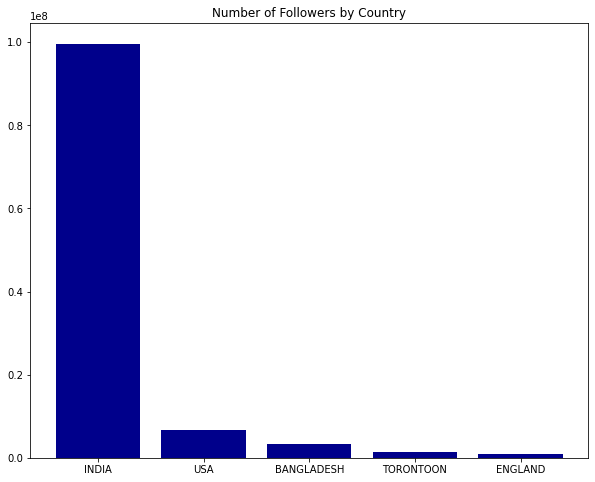

In [170]:
Followers_by_country = Data.groupby(by=["country"])["followers"].sum()
Followers_by_country  = pd.DataFrame(Followers_by_country )
Followers_by_country=Followers_by_country['followers'].sort_values(ascending=False)[0:5]
Followers_by_country  = pd.DataFrame(Followers_by_country)
Followers_by_country.reset_index(level=0, inplace=True)
Followers_by_country
fig, ax = plt.subplots(figsize =(10, 8)) 
plt.bar(Followers_by_country ["country"], Followers_by_country ["followers"], color = "darkblue")
plt.title('Number of Followers by Country')
plt.show()

   Analysis  likescount
0  Negative        2125
1   Neutral        2066
2  Positive       10653


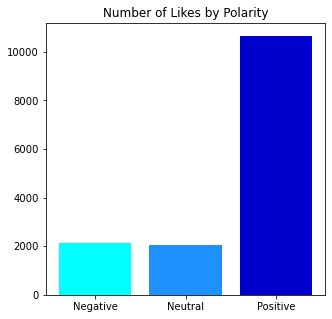

In [153]:
#polarity vs likes
likes_by_analysis = Data.groupby(by=["Analysis"])["likescount"].sum()
likes_by_analysis  = pd.DataFrame(likes_by_analysis)
likes_by_analysis .reset_index(level=0, inplace=True)

New_Colors = ['cyan','dodgerblue','mediumblue']
fig, ax = plt.subplots(figsize =(5, 5)) 
plt.bar(likes_by_analysis["Analysis"], likes_by_analysis["likescount"], color = New_Colors)

plt.title('Number of Likes by Polarity')

plt.show()

In [58]:
top_users = Data['username'].value_counts(normalize=False, sort=True, ascending=False)[0:10]
top_users = Data.loc[Data['followers']==Data['followers'].max(),["followers","text"]]
popular = Data['followers'].value_counts(normalize=False, sort=True, ascending=True).index.tolist()
Data.loc[Data["followers"].isin(popular),["followers","text"]]
popular[0:10]
# popular
#the highest 20 users in terms of followers
data2= data.nlargest(20, ['followers']).loc[:,["followers","text"]]
data2.head(20)

[751, 19, 949, 952, 3008, 48065, 963, 12597, 967, 5034]

Text(0.5, 1.0, 'Number of Tweet per Day')

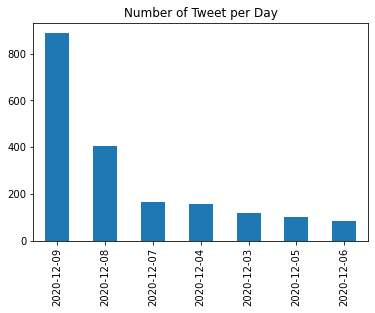

In [173]:
Data['tweetdate'].value_counts().plot(kind='bar')
plt.title('Number of Tweet per Day')

{'the_hindu': 1.3916666666666666,
 'DDNewslive': 1.1478354978354979,
 'airnewsalerts': 1.2,
 'firstpost': 0.0,
 'katiecouric': 0.175,
 'FinancialXpress': 0.26666666666666666,
 'otvnews': 0.0,
 'MumbaiMirror': -0.25,
 'HarvardChanSPH': 0.0,
 'DhakaTribune': 2.0}

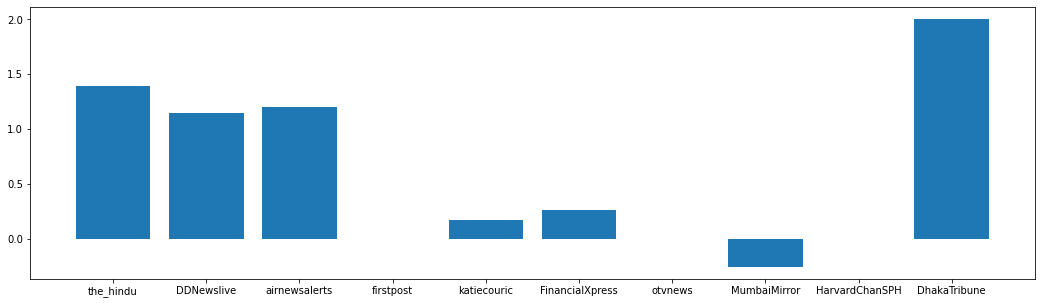

In [177]:
top_user_by_followers = Data.sort_values(by='followers', ascending=False).drop_duplicates(subset=['username'])[:10]['username']
users_polarity = {}
for user in top_user_by_followers:
    users_polarity[user] = Data.groupby(by=["username"]).get_group(user)["Polarity"].sum()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(users_polarity.keys(), users_polarity.values())

top_user_by_followers
users_polarity

In [192]:
Data['username'].value_counts(normalize=False, sort=True, ascending=False)[0:10]

latestly           38
JagranEnglish      14
timethief          12
editorji           11
thebuddhistgoth    10
DhakaTribune       10
the_hindu           9
MicheleD2020        8
juliettejenn03      8
HolisticZombie      8
Name: username, dtype: int64

<BarContainer object of 10 artists>

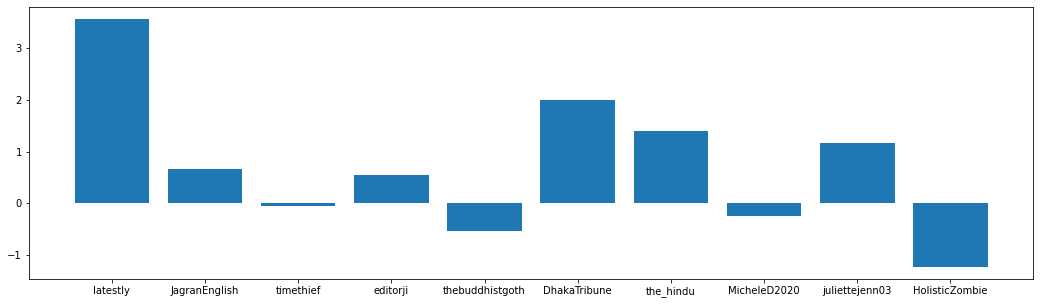

In [184]:
top_frequent_users = Data.username.value_counts()[:10]
top_frequent_users = top_frequent_users.keys()
freq_users_polarity = {}
for user in top_frequent_users:
    freq_users_polarity[user] = Data.groupby(by=["username"]).get_group(user)["Polarity"].sum()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(freq_users_polarity.keys(), freq_users_polarity.values())

<BarContainer object of 5 artists>

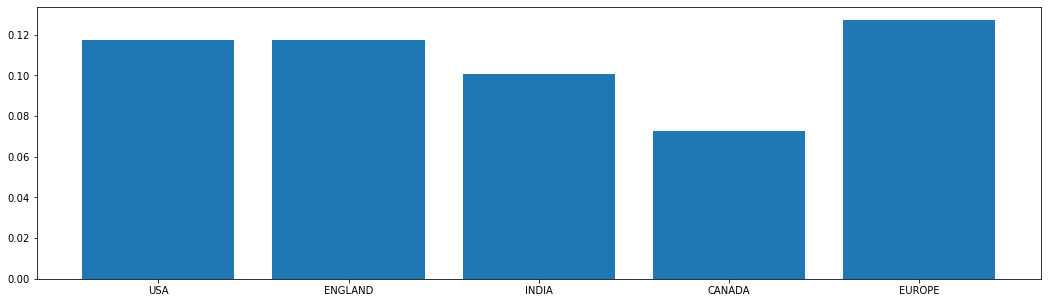

In [193]:
top_countries_names = Data['country'].value_counts(normalize=False, sort=True, ascending=False).index.tolist()[:5]
top_countries_counts = Data['country'].value_counts(normalize=False, sort=True, ascending=False).tolist()[:5]

countries_positivity = {}
i =0 
for country in top_countries_names:
    by_country = Data.groupby(by=["country"]).get_group(country)
    score = by_country["Polarity"].sum()/by_country['tweetid'].count()
    i += 1
    countries_positivity[country] =  score
# print(countries_positivity)
f, ax = plt.subplots(figsize=(18,5))
plt.bar(countries_positivity.keys(), countries_positivity.values())

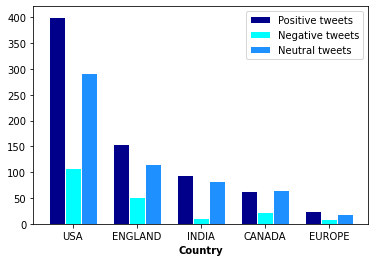

In [203]:
df = Data
polarity_cases_by_country = {}

for country in top_countries_names:
    pos = df.groupby(by=["country"]).get_group(country)['Polarity'].apply(lambda x: (float(x) > 0 )).reset_index(name='count').sum()
    neg = df.groupby(by=["country"]).get_group(country)['Polarity'].apply(lambda x: (float(x) < 0 )).reset_index(name='count').sum()
    neutral = df.groupby(by=["country"]).get_group(country)['Polarity'].apply(lambda x: (float(x) == 0 )).reset_index(name='count').sum()
    
    polarity_cases_by_country[country] = [pos['count'], neg['count'],neutral['count']]  
    
    

barWidth = 0.25
 
bars1 = [i[0] for i in polarity_cases_by_country.values()]
bars2 = [i[1] for i in polarity_cases_by_country.values()]
bars3 = [i[2] for i in polarity_cases_by_country.values()]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='darkblue', width=barWidth, edgecolor='white', label='Positive tweets')
plt.bar(r2, bars2, color='cyan', width=barWidth, edgecolor='white', label='Negative tweets')
plt.bar(r3, bars3, color='dodgerblue', width=barWidth, edgecolor='white', label='Neutral tweets')
 
# Add xticks on the middle of the group bars
plt.xlabel('Country', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], polarity_cases_by_country.keys())

# Create legend & Show graphic
plt.legend()
plt.show()